In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import linecache

In [47]:
df = pd.read_csv('Mobile phone price.csv')

In [48]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [50]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [51]:
y = [x for x in df['Price ($)'] if x.isnumeric() == False]
print(y)

['$799 ', '$799 ', '$399 ', '$699 ', '$329 ', '$399 ', '$999 ', '$699 ', '$699 ', '$549 ', '$1,299 ', '$999 ', '$899 ', '$399 ', '$449 ', '$319 ', '$269 ', '$349 ', '$269 ', '$279 ', '$249 ', '$349 ', '$699 ', '$699 ', '$299 ', '$999 ', '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$699 ', '$99 ', '$199 ', '$169 ', '$999 ', '$499 ', '$399 ', '$799 ', '$179 ', '$219 ', '$249 ', '$149 ', '$199 ', '$279 ', '$179 ', '$899 ', '$269 ', '$229 ', '$399 ', '$239 ', '$149 ', '$279 ', '$329 ', '$149 ', '$549 ', '$449 ', '$279 ', '$199 ', '$399 ', '$179 ', '$399 ', '$109 ', '$219 ', '$149 ', '$299 ', '$279 ', '$149 ', '$189 ', '$169 ', '$389 ', '$1,199 ', '$299 ', '$219 ', '$299 ', '$149 ', '$249 ', '$219 ', '$249 ', '$179 ', '$299 ', '$309 ', '$179 ', '$369 ', '$349 ', '$499 ', '$199 ', '$229 ', '$299 ', '$129 ', '$449 ', '$499 ', '$279 ', '$399 ', '$849 ', '$279 ', '$299 ', '$249 ', '$149 ', '$199 ', '$469 ', '$329 ', '$279 ', '$369 ', '$269 ', '$329 ', '$299 ', '$299 ', '$239 ', '$329 ', '$149

In [52]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
def removing_punctuation_df(df, column_name):
    """
    This function looks at a certain column. It then iterates through each row, first changing the object message
    into a string. Then it checks for any punctuations in the message and gets rid of them. Then we take the
    message and turn it into a integer and add it into a list.
    """
    removed_df = []
    for a in df[column_name]:
        message = str(a)
        punct_removed = [char for char in message if char not in string.punctuation]
        punct_removed = ''.join(punct_removed)
        punct_removed = int(punct_removed)
        removed_df.append(punct_removed)
    return removed_df

In [54]:
Price = removing_punctuation_df(df, 'Price ($)') 
df['Price'] = Price
df = df.drop(['Price ($)'], axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price                   407 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 25.6+ KB


In [56]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [57]:
y = [x for x in df['Screen Size (inches)'] if isfloat(x) == False]
print(y)

['6.8 + 3.9', '7.6 (unfolded)']


In [58]:
y = [x for x in df['Storage '] if x.isnumeric() == False]
print(y)

['128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '64 GB', '256 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '32 GB', '128 GB', '32 GB', '128 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '64 GB', '64 GB', '64 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '256 GB', '64 GB', '32 GB', '128 GB', '128 GB', '128 GB', '256 GB', '128 GB', '128 GB', '128 GB', '64 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '64 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '128 GB', '256 GB', '64 GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '256GB', '256GB', '256GB', '128GB', '128GB', '256GB', '256GB', '64GB', '128GB', '128GB', '128GB', '128GB', '128GB', '128GB', '64GB', '128GB', '128GB', '64GB', '32GB', '128GB', '256GB', '256GB', 

In [59]:
y = [x for x in df['RAM '] if x.isnumeric() == False]
print(y)

['6 GB', '12 GB', '8 GB', '6 GB', '8 GB', '4 GB', '8 GB', '6 GB', '8 GB', '12 GB', '6 GB', '6 GB', '8 GB', '4 GB', '12 GB', '6 GB', '8 GB', '6 GB', '6 GB', '8 GB', '6 GB', '4 GB', '6 GB', '8 GB', '6 GB', '4 GB', '3 GB', '6 GB', '3 GB', '4 GB', '6 GB', '4 GB', '3 GB', '6 GB', '8 GB', '4 GB', '6 GB', '8 GB', '4 GB', '3 GB', '3 GB', '4 GB', '4 GB', '8 GB', '8 GB', '4 GB', '8 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '4 GB', '2 GB', '6 GB', '4 GB', '4 GB', '6 GB', '8 GB', '8 GB', '12 GB', '4 GB', '3 GB', '8 GB', '8 GB', '6 GB', '8 GB', '6 GB', '3 GB', '4 GB', '4 GB', '4 GB', '8 GB', '6 GB', '4 GB', '12 GB', '4 GB', '4GB', '8GB', '8GB', '8GB', '6GB', '8GB', '12GB', '12GB', '12GB', '6GB', '8GB', '8GB', '8GB', '4GB', '6GB', '6GB', '8GB', '8GB', '8GB', '6GB', '4GB', '6GB', '6GB', '6GB', '3GB', '8GB', '12GB', '12GB', '3GB', '3GB', '3GB', '6GB', '2GB', '6GB', '4GB', '8GB', '6GB', '6GB', '12GB', '4GB', '6GB', '4GB', '4GB', '4GB', '6GB', '4GB', '8GB', '6GB', '6GB', '6GB', '4GB', '3GB', '6GB', '

In [60]:
df.iloc[88,4] = 6.8
df.iloc[373,4] = 7.8

In [61]:
df['Screen Size (in)'] = [float(size) for size in df['Screen Size (inches)']]
df = df.drop('Screen Size (inches)', axis=1)

In [62]:
def no_GBs(df, column):
    y = []
    for x in df[column]:
        string = x.replace("GB", "")
        string = int(string)
        y.append(string)
    return y

In [63]:
RAM = no_GBs(df, "RAM ")
df['RAM'] = RAM
df = df.drop('RAM ', axis=1)

In [64]:
Storage = no_GBs(df, 'Storage ')
df['Storage'] = Storage
df = df.drop('Storage ', axis=1)

In [65]:
df['Brand'] = df['Brand'].str.lower()
df['Model'] = df['Model'].str.lower()

In [66]:
df.rename(columns = {"jumlah kamera": "JumlahKamera","Battery Capacity (mAh)": "BatteryCapacity","Screen Size (in)": "ScreenSize"},inplace=True)

In [67]:
df.head()

,Brand,Model,Camera (MP),BatteryCapacity,Price,ScreenSize,RAM,Storage
0,apple,iphone 13 pro,12 + 12 + 12,3095,999,6.10,6,128
1,samsung,galaxy s21 ultra,108 + 10 + 10 + 12,5000,1199,6.80,12,256
2,oneplus,9 pro,48 + 50 + 8 + 2,4500,899,6.70,8,128
3,xiaomi,redmi note 10 pro,64 + 8 + 5 + 2,5020,279,6.67,6,128
4,google,pixel 6,50 + 12.2,4614,799,6.40,8,128


In [68]:
df['JumlahKamera'] = df['Camera (MP)'].str.count('\\+') + 1

In [69]:
df['JumlahKamera'].unique()

array([3, 4, 2, 1], dtype=int64)

In [70]:
df.head()

,Brand,Model,Camera (MP),BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera
0,apple,iphone 13 pro,12 + 12 + 12,3095,999,6.10,6,128,3
1,samsung,galaxy s21 ultra,108 + 10 + 10 + 12,5000,1199,6.80,12,256,4
2,oneplus,9 pro,48 + 50 + 8 + 2,4500,899,6.70,8,128,4
3,xiaomi,redmi note 10 pro,64 + 8 + 5 + 2,5020,279,6.67,6,128,4
4,google,pixel 6,50 + 12.2,4614,799,6.40,8,128,2


In [71]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)
    
    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df = df.drop(columns='Camera (MP)')

In [72]:
df.rename(columns = {"res1":"cam1","res2":"cam2","res3":"cam3","res4":"cam4"},inplace=True)

In [73]:
df['cam1'] = df['cam1'].str.replace('MP','')
df['cam2'] = df['cam2'].str.replace('MP','')
df['cam3'] = df['cam3'].str.replace('MP','')
df['cam4'] = df['cam4'].str.replace('MP','')

In [74]:
df['cam4'] = df['cam4'].str.replace('3D','0')
df['cam4'] = df['cam4'].str.replace('ToF','0')

In [75]:
df['cam1'] = pd.to_numeric(df['cam1'])

df['cam2'] = pd.to_numeric(df['cam2'])

df['cam3'] = pd.to_numeric(df['cam3'])

df['cam4'] = pd.to_numeric(df['cam4'])

In [76]:
print(df[292:293])

      Brand        Model  BatteryCapacity  Price  ScreenSize  RAM  Storage  \
292  huawei  mate 40 pro             4400   1199        6.76    8      256   

     JumlahKamera  cam1  cam2  cam3  cam4  
292             4  50.0  20.0    12   0.0  


In [77]:
df.head()

,Brand,Model,BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4
0,apple,iphone 13 pro,3095,999,6.10,6,128,3,12.0,12.0,12,0.0
1,samsung,galaxy s21 ultra,5000,1199,6.80,12,256,4,108.0,10.0,10,12.0
2,oneplus,9 pro,4500,899,6.70,8,128,4,48.0,50.0,8,2.0
3,xiaomi,redmi note 10 pro,5020,279,6.67,6,128,4,64.0,8.0,5,2.0
4,google,pixel 6,4614,799,6.40,8,128,2,50.0,12.2,0,0.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            407 non-null    object 
 1   Model            407 non-null    object 
 2   BatteryCapacity  407 non-null    int64  
 3   Price            407 non-null    int64  
 4   ScreenSize       407 non-null    float64
 5   RAM              407 non-null    int64  
 6   Storage          407 non-null    int64  
 7   JumlahKamera     407 non-null    int64  
 8   cam1             407 non-null    float64
 9   cam2             407 non-null    float64
 10  cam3             407 non-null    int64  
 11  cam4             407 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 38.3+ KB


In [79]:
df['idBrand']=df.loc[:,'Brand']

In [80]:
df['idBrand']=df['idBrand'].replace(['cat','sony','blackberry','lg','asus','google','huawei','oneplus','motorola','nokia','apple','vivo','realme','oppo','xiaomi','samsung'],['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016'])
df[['idBrand']]=df[['idBrand']].apply(pd.to_numeric)

In [81]:
df.head()

,Brand,Model,BatteryCapacity,Price,ScreenSize,RAM,Storage,JumlahKamera,cam1,cam2,cam3,cam4,idBrand
0,apple,iphone 13 pro,3095,999,6.10,6,128,3,12.0,12.0,12,0.0,11
1,samsung,galaxy s21 ultra,5000,1199,6.80,12,256,4,108.0,10.0,10,12.0,16
2,oneplus,9 pro,4500,899,6.70,8,128,4,48.0,50.0,8,2.0,8
3,xiaomi,redmi note 10 pro,5020,279,6.67,6,128,4,64.0,8.0,5,2.0,15
4,google,pixel 6,4614,799,6.40,8,128,2,50.0,12.2,0,0.0,6


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            407 non-null    object 
 1   Model            407 non-null    object 
 2   BatteryCapacity  407 non-null    int64  
 3   Price            407 non-null    int64  
 4   ScreenSize       407 non-null    float64
 5   RAM              407 non-null    int64  
 6   Storage          407 non-null    int64  
 7   JumlahKamera     407 non-null    int64  
 8   cam1             407 non-null    float64
 9   cam2             407 non-null    float64
 10  cam3             407 non-null    int64  
 11  cam4             407 non-null    float64
 12  idBrand          407 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 41.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            407 non-null    object 
 1   Model            407 non-null    object 
 2   BatteryCapacity  407 non-null    int64  
 3   Price            407 non-null    int64  
 4   ScreenSize       407 non-null    float64
 5   RAM              407 non-null    int64  
 6   Storage          407 non-null    int64  
 7   JumlahKamera     407 non-null    int64  
 8   cam1             407 non-null    float64
 9   cam2             407 non-null    float64
 10  cam3             407 non-null    int64  
 11  cam4             407 non-null    float64
 12  idBrand          407 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 41.5+ KB
None
       BatteryCapacity        Price  ScreenSize         RAM     Storage  \
count       407.000000   407.000000  407.000000  407.000000  4

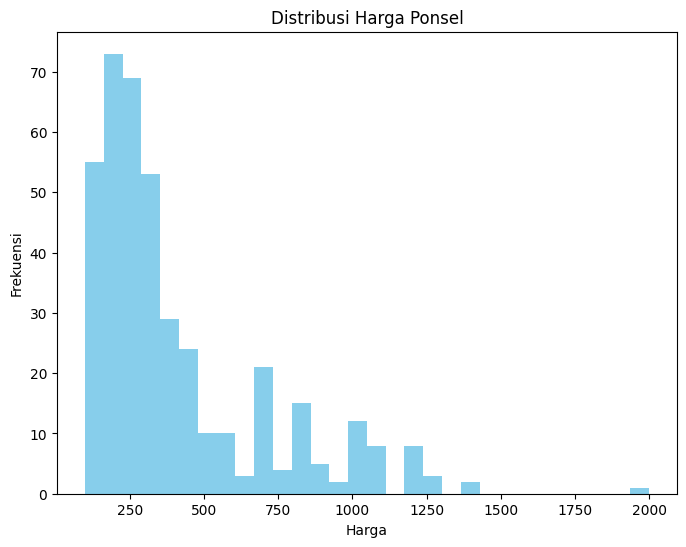

In [83]:
# EDA

print(df.info())

print(df.describe())

print(df.isnull().sum())

print(df['Price'].value_counts())

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue')
plt.title('Distribusi Harga Ponsel')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()


In [84]:
#SCALING DATA

from sklearn.preprocessing import StandardScaler

numerical_features = ['BatteryCapacity', 'ScreenSize', 'RAM', 'Storage', 'JumlahKamera', 'cam1', 'cam2', 'cam3', 'cam4']

scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())


     Brand              Model  BatteryCapacity  Price  ScreenSize       RAM  \
0    apple      iphone 13 pro        -1.986246    999   -1.154384  0.066761   
1  samsung   galaxy s21 ultra         0.406327   1199    1.019337  2.536923   
2  oneplus              9 pro        -0.221645    899    0.708805  0.890149   
3   xiaomi  redmi note 10 pro         0.431446    279    0.615646  0.066761   
4   google            pixel 6        -0.078467    799   -0.222789  0.890149   

    Storage  JumlahKamera      cam1      cam2      cam3      cam4  idBrand  
0  0.076342     -0.184798 -1.271147  0.282830  1.706949 -0.572702       11  
1  2.049114      1.089994  2.625162  0.086024  1.298525  6.414754       16  
2  0.076342      1.089994  0.189969  4.022143  0.890102  0.591874        8  
3  0.076342      1.089994  0.839354 -0.110782  0.277467  0.591874       15  
4  0.076342     -1.459589  0.271142  0.302511 -0.743591 -0.572702        6  


In [85]:
# FEATURE SELECTION

unused_columns = ['Brand', 'ScreenSize' , 'Model', 'idBrand']

df = df.drop(unused_columns, axis=1)

print(df.head())


   BatteryCapacity  Price       RAM   Storage  JumlahKamera      cam1  \
0        -1.986246    999  0.066761  0.076342     -0.184798 -1.271147   
1         0.406327   1199  2.536923  2.049114      1.089994  2.625162   
2        -0.221645    899  0.890149  0.076342      1.089994  0.189969   
3         0.431446    279  0.066761  0.076342      1.089994  0.839354   
4        -0.078467    799  0.890149  0.076342     -1.459589  0.271142   

       cam2      cam3      cam4  
0  0.282830  1.706949 -0.572702  
1  0.086024  1.298525  6.414754  
2  4.022143  0.890102  0.591874  
3 -0.110782  0.277467  0.591874  
4  0.302511 -0.743591 -0.572702  


In [87]:
#SPLIT TRAINTEST

from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)  
y = df['Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data pada X_train:", len(X_train))
print("Jumlah data pada X_test:", len(X_test))
print("Jumlah data pada y_train:", len(y_train))
print("Jumlah data pada y_test:", len(y_test))

Jumlah data pada X_train: 325
Jumlah data pada X_test: 82
Jumlah data pada y_train: 325
Jumlah data pada y_test: 82


In [89]:
#CROSS VALIDATION

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  

num_folds = 5
cross_val_scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='r2')

print(f"Hasil K-Fold Cross-Validation untuk {num_folds} fold:")
print(cross_val_scores)
print(f"Rata-rata Score Cross-Validation: {cross_val_scores.mean():.4f}")

Hasil K-Fold Cross-Validation untuk 5 fold:
[0.82598254 0.82037696 0.57160887 0.73113786 0.78352807]
Rata-rata Score Cross-Validation: 0.7465


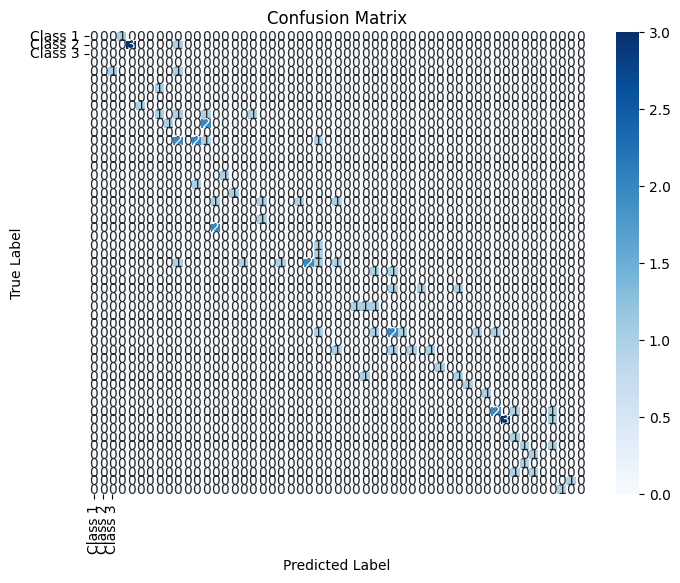

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
RMSE: 120.3809
R-squared: 0.8414


In [91]:
#PERFORMANCE EVALUATION

from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round()) 

plot_confusion_matrix(cm, classes=['Class 1', 'Class 2', 'Class 3'])

model = DecisionTreeRegressor()  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix:")
print(cm)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")